# 스타벅스, 이디야 매장위치 비교하기

- 이디야는 스타벅스 근처에 입점한다는 설이 있다.
- 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 나는지 알아보자.
- 사용해볼 라이브러리는 Pandas, Numpy, Seaborn, Matplotlib, folium 정도

- 텍스트 데이터를 정제하고 원하는 정보를 찾아내는 실습
- 문자열에서 원하는 텍스트 추출
- 문자열을 활용한 다양한 분석 방법과 위치 정보 사용
- Folium을 통한 위경도 데이터 시각화 이해

# 라이브러리 불러오기 / 시각화를 위한 한글 폰트 설정

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# 한글 폰트 설정
# '-' 표시 되도록
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [76]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 한다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# EDA

## 데이터 불러오기, 형태 확인

In [77]:
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.shape

(573680, 39)

In [78]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [79]:
# info 함수를 통해 데이터의 전체적인 정보를 볼 수 있다.
# 데이터의 사이즈, 타입, 메모리 사용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

# 전처리

## 결측치 확인 및 제거

- isnull()을 사용하면 데이터의 결측치를 확인할 수 있다.

<AxesSubplot:>

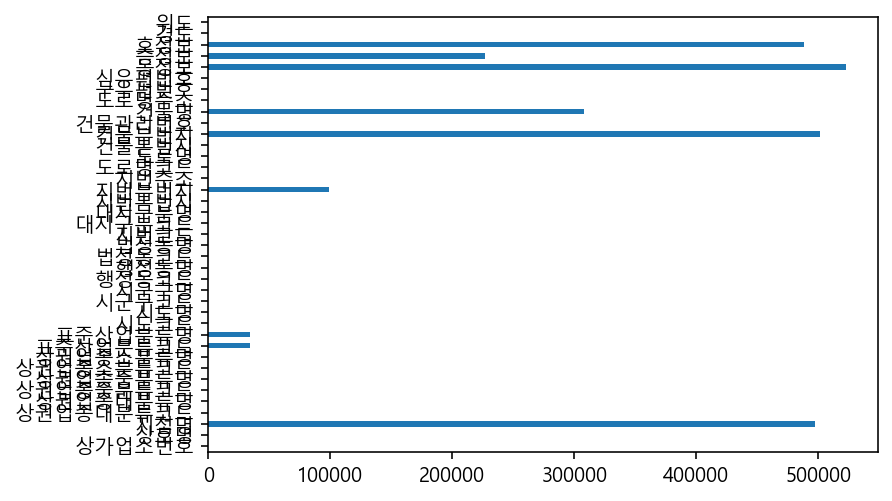

In [80]:
df.isnull().sum().plot.barh()

## 사용하지 않는 컬럼 제거

In [81]:
# 사용할 컬럼만 columns 리스트에 넣어준다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
          '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']

df = df[columns].copy()
df.shape    # 컬럼의 수가 11개로 줄어든 것을 확인할 수 있다. / 메모리 사용량도 줄었다.

(573680, 11)

## 서울시만 따로 확인

In [82]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(407376, 11)

## 일부 텍스트가 들어가는 데이터만 가져오기 (이디야, 스타벅스)

In [83]:
# 문자열의 소문자로 변경하는  메소드를 사용한다.
# '상호명_소문자' 라는 새로운 컬럼을 만든다.
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

- 이디야

In [84]:
# ediya를 '상호명_소문자' 컬럼으로 가져오기
# '상호명_소문자'컬럼으로 '이디야|ediya' 를 가져와서 개수 확인
df_seoul[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya')].shape

(543, 12)

In [85]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'), '상호명_소문자']

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

- 스타벅스

In [86]:
# starbucks를 '상호명_소문자' 컬럼으로 가져오기
# '상호명_소문자' 컬럼으로 'starbucks|스타벅스' 를 가져와서 개수 확인
df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks')].shape

(506, 12)

In [87]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명_소문자']

1104                스타벅스
2023           스타벅스종로3가점
2770                스타벅스
14770     스타벅스커피여의도ifc1f
14781               스타벅스
               ...      
563387              스타벅스
567090              스타벅스
567828              스타벅스
570096              스타벅스
571052              스타벅스
Name: 상호명_소문자, Length: 506, dtype: object

- '상호명_소문자' 컬럼으로 '스타벅스|starbucks|이디야|ediya'를 가져와 df_cafe 변수에 담기

In [88]:
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

- 스타벅스만 '브랜드명'이라는 새로운 컬럼에 '스타벅스'라고 넣어주기

In [89]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'
df_cafe[['상호명_소문자', '브랜드명']].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,NaN
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,NaN


- 이디야만 '브랜드명'이라는 새로운 컬럼에 '이디야'라고 넣어주기

In [90]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('이디야|이디아|ediya'), '브랜드명'] = '이디야'
df_cafe[['상호명_소문자', '브랜드명']].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


# 시각화
- 시각화 이전에 데이터를 조금 정리해줘야 한다.

- '상권업종중분류명'이 카페가 아닌 광고/인쇄, 학원 등 다른 업종이 있는 것을 확인

<AxesSubplot:>

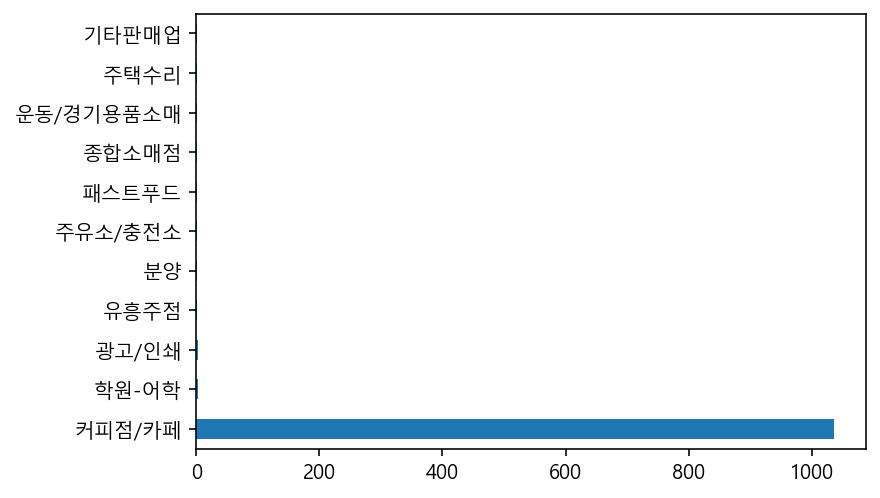

In [91]:
df_cafe['상권업종중분류명'].value_counts().plot.barh()

- 커피점/카페만 남기고 제거

In [92]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe['상권업종중분류명'] == '커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

- 브랜드명으로 각 카페의 개수 세어보기

In [93]:
df_cafe['브랜드명'].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

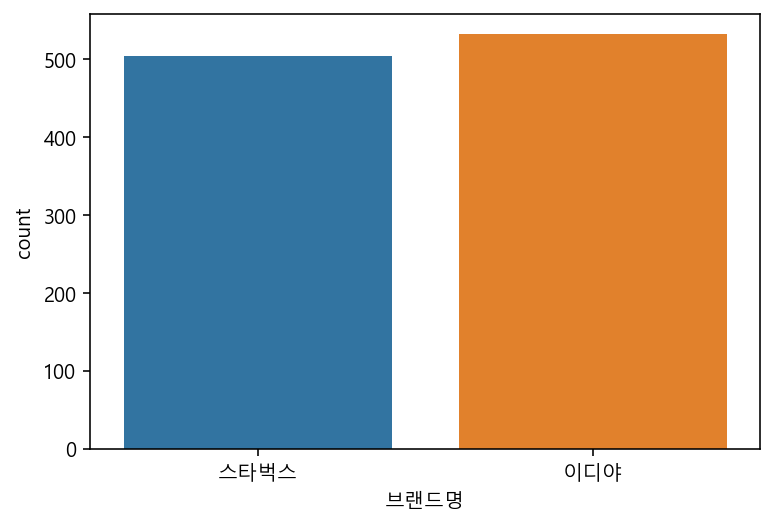

In [94]:
sns.countplot(data=df_cafe, x='브랜드명')

## countplot으로 시군구별 스타벅스, 이디야 분포 확인

<AxesSubplot:xlabel='시군구명', ylabel='count'>

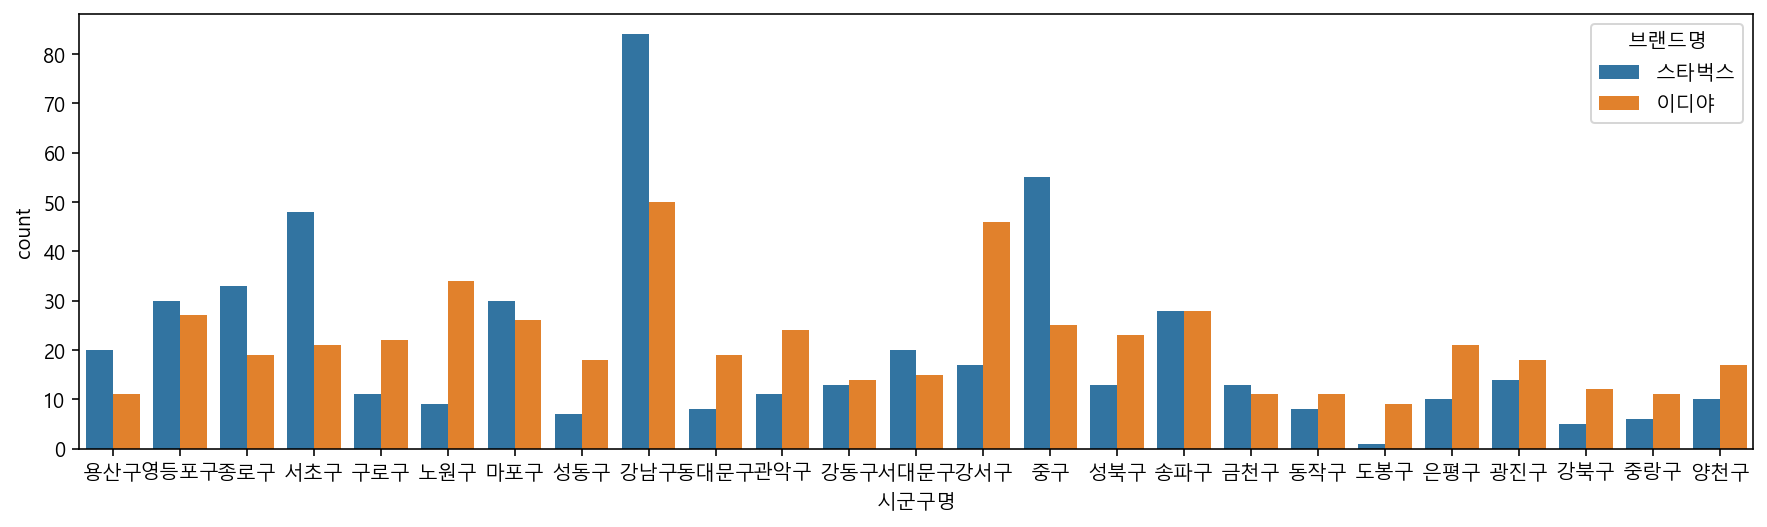

In [95]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

## scatterplot으로 위도, 경도 사용하여 그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

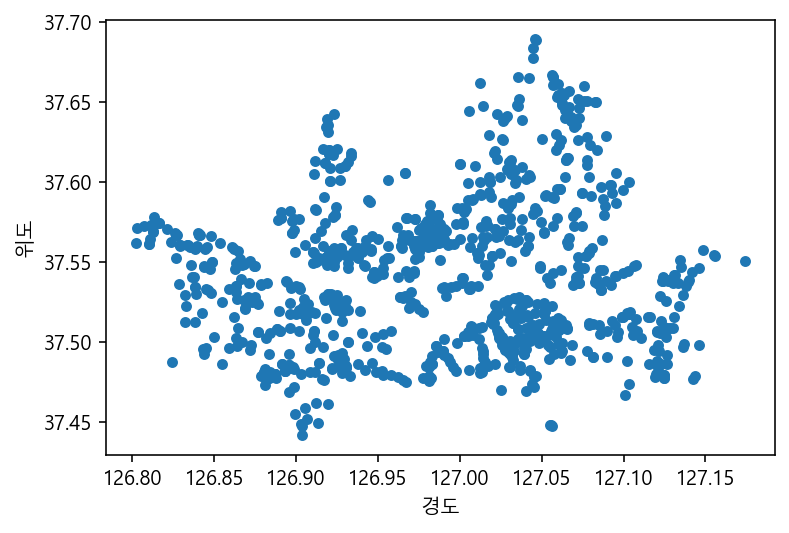

In [96]:
# pandas의 scatterplot
df_cafe[['위도','경도']].plot.scatter(x='경도', y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

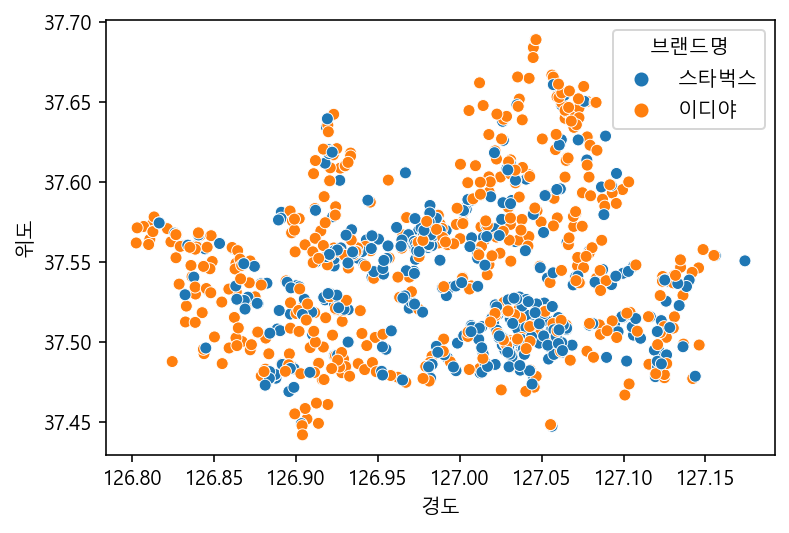

In [97]:
# seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

## jointplot 그리기

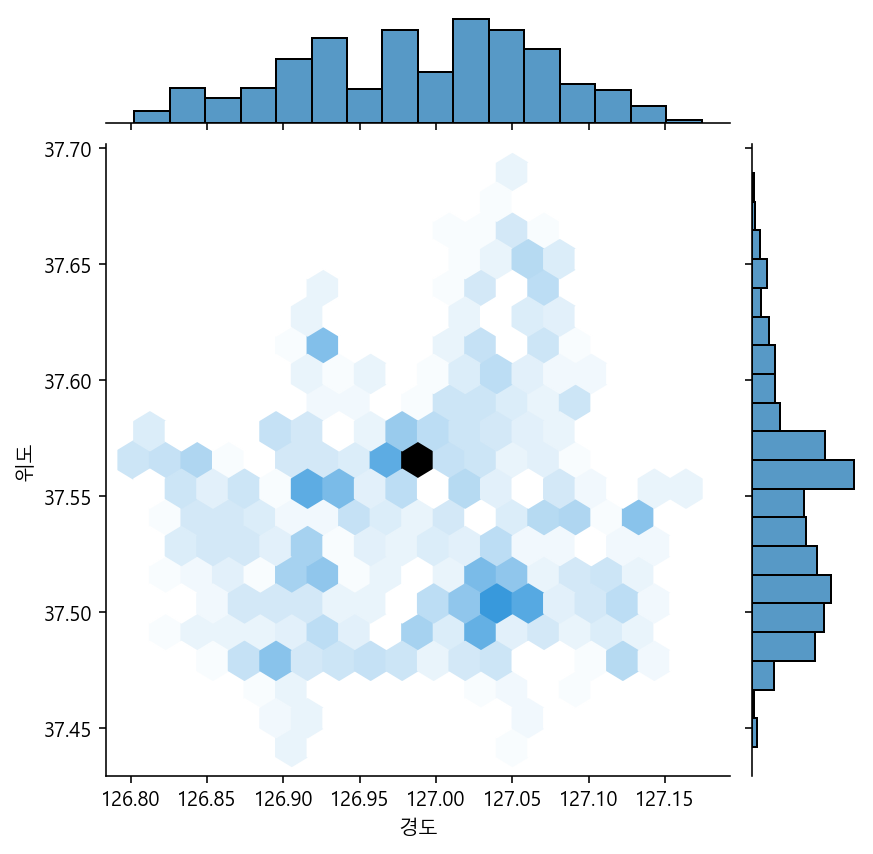

In [98]:
# kde는 밀도를 추정해서 그릴 수 있도록
# sns.jointplot(data=df_cafe, x='경도', y='위도', kind='kde')
sns.jointplot(data=df_cafe, x='경도', y='위도', kind='hex')

# 구별 브랜드별 점포수 확인

## groupby

In [99]:
df_cafe_vs = df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

- 위와 같은 시리즈 형태를 데이터프레임으로 바꿔주는 것 때문에 저번 학기 개고생했었는데 알게됨.

In [100]:
df_cafe_vs.to_frame()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5
     이디야    12
강서구  스타벅스   17
     이디야    46
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    18
구로구  스타벅스   11
     이디야    22
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    26
서대문구 스타벅스   20
     이디야    15
서초구  스타벅스   48
     이디야    21
성동구  스타벅스    7
     이디야    18
성북구  스타벅스   13
     이디야    23
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   10
     이디야    17
영등포구 스타벅스   30
     이디야    27
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    19
중구   스타벅스   55
     이디야    25
중랑구  스타벅스    6
     이디야    11

In [101]:
df_cafe_vs.reset_index()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


In [102]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


- groupby '시군구명', '브랜드명'으로 개수를 세보기
- 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 바꾸기

In [103]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


## pivot_table

In [104]:
# aggfunc은 mean이 기본값인데, 상호명은 숫자가 아니다. 그래서 count값으로 변경시킨다.
pivot = pd.pivot_table(data=df_cafe, index=['시군구명', '브랜드명'], values='상호명', aggfunc='count')
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [105]:
# 특정 구 데이터만 가져와서 확인
pivot.loc['강남구']

,상호명
브랜드명,
스타벅스,84
이디야,50


> 결론
- 어떤 형태로 반환되는지가 가장 큰 차이점.
- groupby는 시리즈의 형태로 반환되기 때문에 더 빠르다.
- pivot_table은 DF의 형태로 반환되기 때문에 더 직관적이다.
- 두가지 방법은 서로 변환 가능하다.
- 코드의 기술적인 부분은 계속 다시 봐야함!

# 시각화 (구별 브랜드별 점포수)

<AxesSubplot:xlabel='구', ylabel='매장수'>

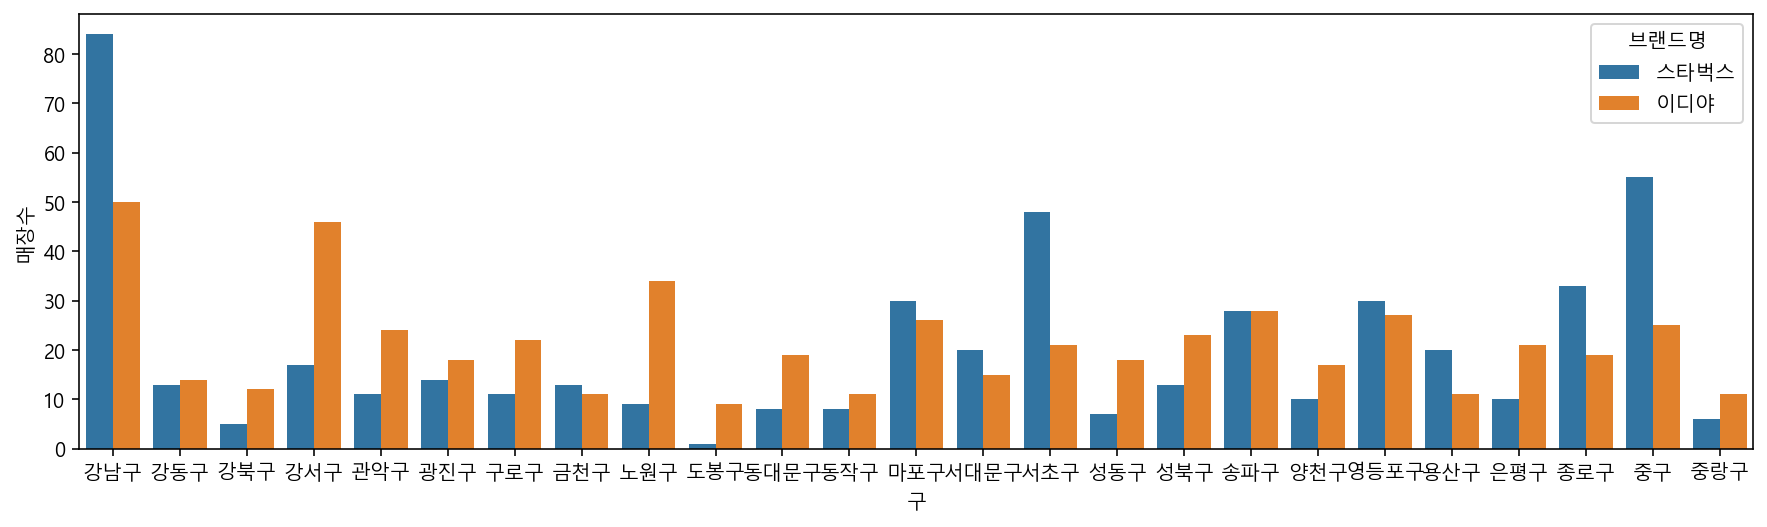

In [106]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs, x='구', y='매장수', hue='브랜드명' )

<AxesSubplot:xlabel='시군구명,브랜드명'>

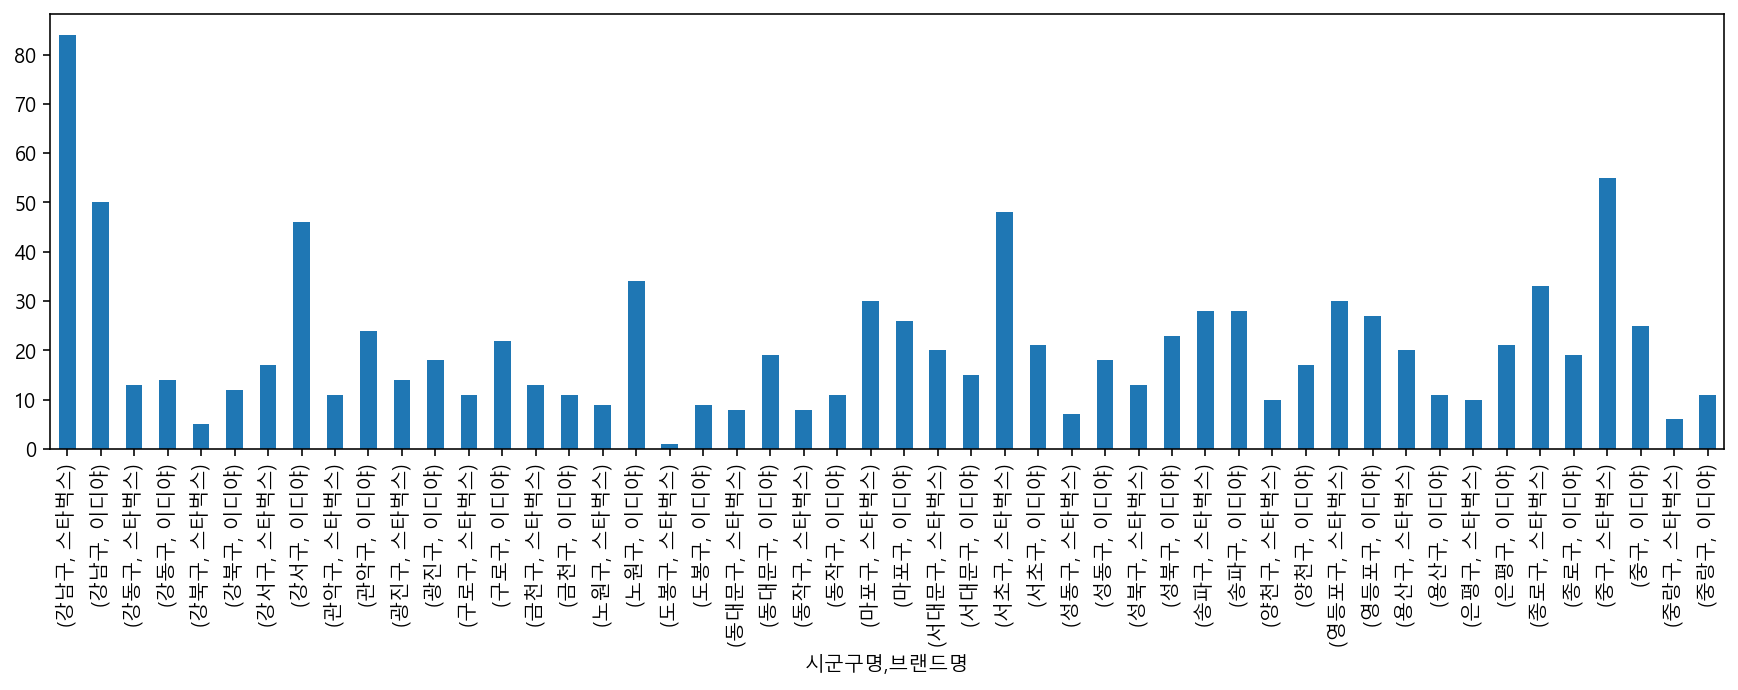

In [109]:
group = df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
group.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명'>

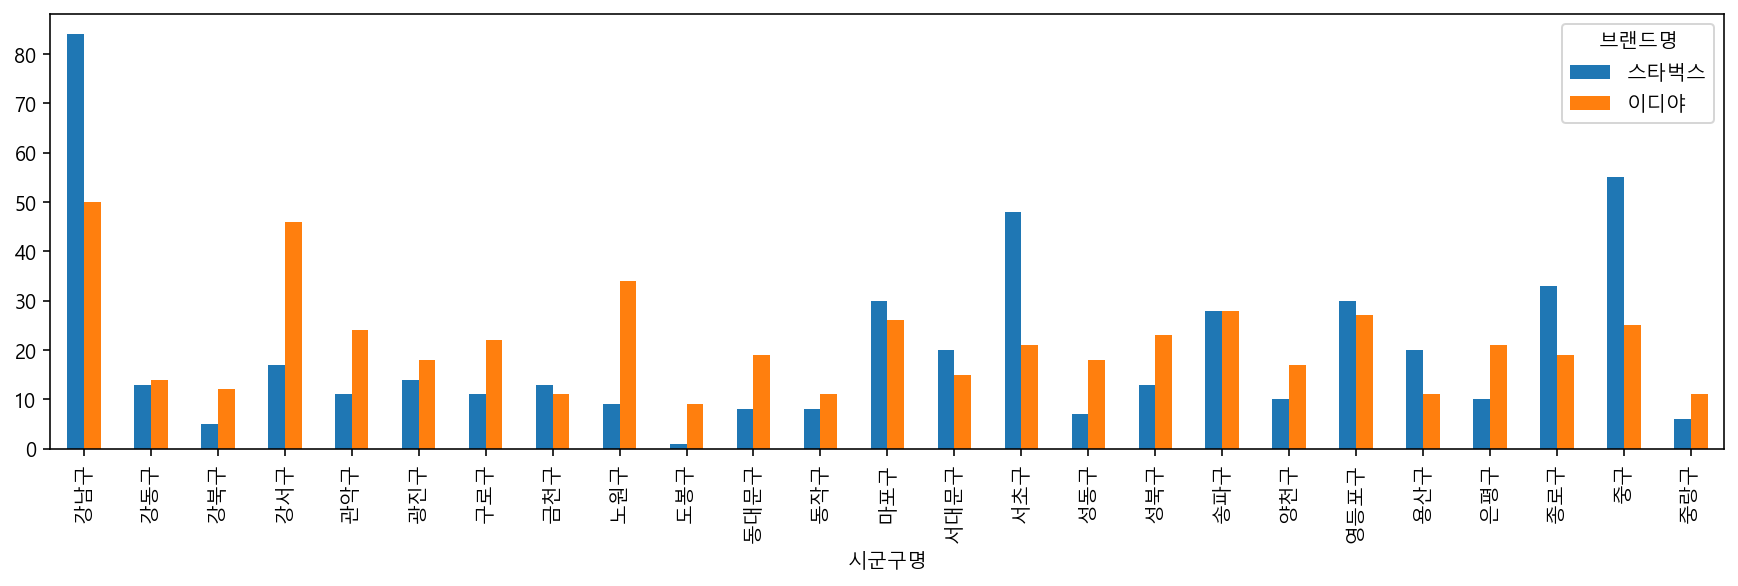

In [115]:
group.unstack().plot.bar(figsize=(15,4))

- Pandas로 시각화 할 때랑 Seaborn으로 시각화 할 때랑 준비해야 하는 데이터의 형태가 다르다.

<AxesSubplot:xlabel='시군구명'>

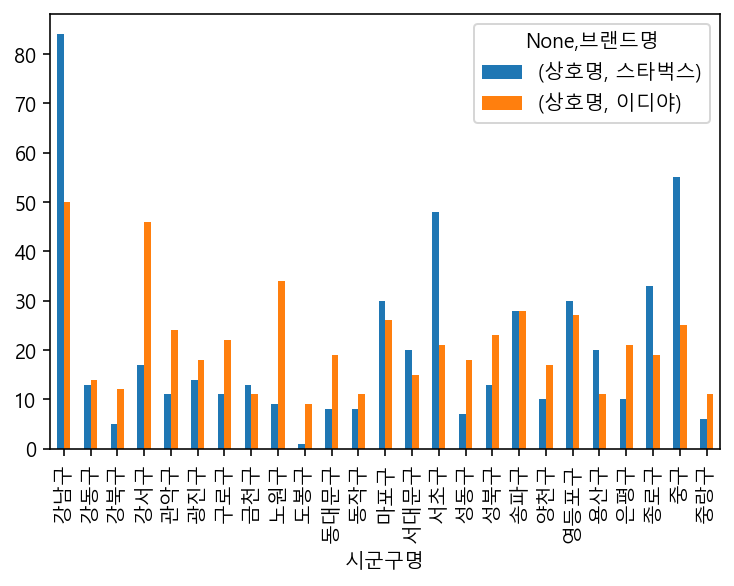

In [127]:
pivot.unstack().plot.bar()

- pivot과 pivot_table의 가장 큰 차이점은 연산을 하고 안하고의 차이이다.

<AxesSubplot:xlabel='시군구명'>

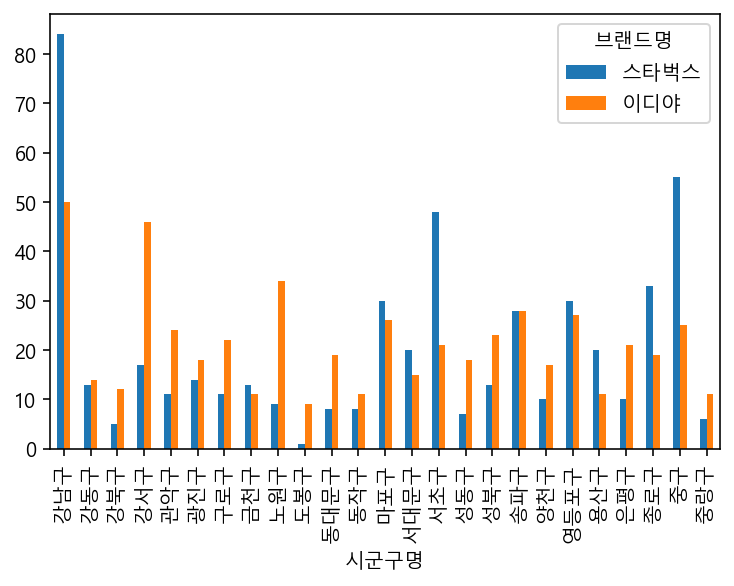

In [120]:
pd.pivot_table(data=df_cafe, index='시군구명', columns='브랜드명', values='상호명', aggfunc='count').plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

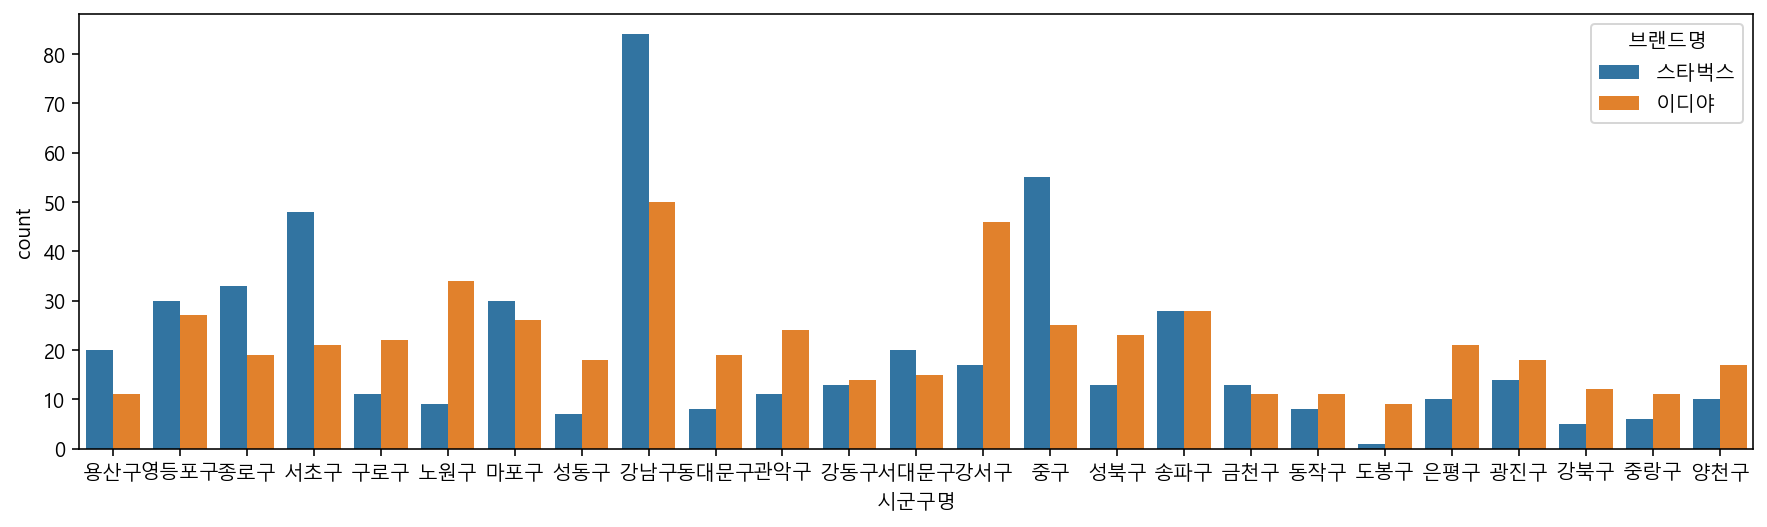

In [129]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')
# seaborn의 장점 : 복잡한 통계연산을 해준다. (count를 알아서 해줬음)